In [208]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import os

In [209]:
#Reading in data
data = pd.read_csv(os.path.join(os.getcwd(),'orderData.csv'))
data.head()

,orderNo,seatNo,item
0,122314,1,Salmon
1,122314,1,Oyster Bay Sauvignon Blanc
2,122314,1,Bean Trio
3,122314,2,Pork Chop
4,122314,2,Three Rivers Red


In [210]:
#Joining orderno and searno
data['id'] = data['orderNo'].astype(str) + '-' + data['seatNo'].astype(str)

In [211]:
data.head()

,orderNo,seatNo,item,id
0,122314,1,Salmon,122314-1
1,122314,1,Oyster Bay Sauvignon Blanc,122314-1
2,122314,1,Bean Trio,122314-1
3,122314,2,Pork Chop,122314-2
4,122314,2,Three Rivers Red,122314-2


In [274]:
#Getting the meat, sides and wine
meat = []
sides = []
wine = []
for i in range(0,len(data),3):
    meat.append(i)
    wine.append(i+1)
    sides.append(i+2)

In [275]:
#Getting the name of meats
meat_list= data[data.index.isin(meat)]['item'].unique().tolist()
meat_list

['Salmon',
 'Pork Chop',
 'Sea Bass',
 'Duck Breast',
 'Swordfish',
 'Pork Tenderloin',
 'Filet Mignon',
 'Roast Chicken']

In [276]:
#Subsetting the datafram with only meat and wine
d1 = data[data.index.isin(meat+wine)]

In [277]:
d1.head()

,orderNo,seatNo,item,id
0,122314,1,Salmon,122314-1
1,122314,1,Oyster Bay Sauvignon Blanc,122314-1
3,122314,2,Pork Chop,122314-2
4,122314,2,Three Rivers Red,122314-2
6,122314,3,Sea Bass,122314-3


In [278]:
d1.item.value_counts()

Filet Mignon                          13407
Sea Bass                              12302
Duckhorn Chardonnay                   11723
Pork Tenderloin                       11138
Pork Chop                             10976
Adelsheim Pinot Noir                  10308
Salmon                                 9336
Blackstone Merlot                      8485
Total Recall Chardonnay                8012
Duck Breast                            7915
Single Vineyard Malbec                 7791
Swordfish                              7439
Innocent Bystander Sauvignon Blanc     6397
Oyster Bay Sauvignon Blanc             4815
Echeverria Gran Syrah                  4600
Brancott Pinot Grigio                  4478
Roast Chicken                          3720
Cantina Pinot Bianco                   3594
Louis Rouge                            2580
Helben Blanc                           2032
Three Rivers Red                       1418
Name: item, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

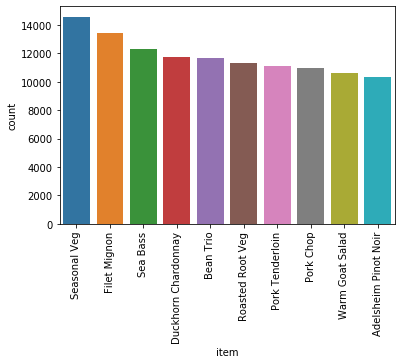

In [279]:
sns.countplot(x = 'item', data = data, order = data['item'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [280]:
#Gouping by items count and unstacking them
df = d1.groupby(['id','item']).size().reset_index(name='count')
basket = (df.groupby(['id','item'])['count'].sum().unstack().reset_index().fillna(0).set_index('id'))

In [281]:
basket.head()

item,Adelsheim Pinot Noir,Blackstone Merlot,Brancott Pinot Grigio,Cantina Pinot Bianco,Duck Breast,Duckhorn Chardonnay,Echeverria Gran Syrah,Filet Mignon,Helben Blanc,Innocent Bystander Sauvignon Blanc,...,Oyster Bay Sauvignon Blanc,Pork Chop,Pork Tenderloin,Roast Chicken,Salmon,Sea Bass,Single Vineyard Malbec,Swordfish,Three Rivers Red,Total Recall Chardonnay
id,,,,,,,,,,,,,,,,,,,,,
122314-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
122314-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122314-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122314-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
122314-5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
#encoding function to convert float to int
def encode(x):
    if x<=0:
        return 0
    if x>= 1:
        return 1
basket_sets = basket.applymap(encode)
basket_sets

item,Adelsheim Pinot Noir,Blackstone Merlot,Brancott Pinot Grigio,Cantina Pinot Bianco,Duck Breast,Duckhorn Chardonnay,Echeverria Gran Syrah,Filet Mignon,Helben Blanc,Innocent Bystander Sauvignon Blanc,...,Oyster Bay Sauvignon Blanc,Pork Chop,Pork Tenderloin,Roast Chicken,Salmon,Sea Bass,Single Vineyard Malbec,Swordfish,Three Rivers Red,Total Recall Chardonnay
id,,,,,,,,,,,,,,,,,,,,,
122314-1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
122314-2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
122314-3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
122314-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
122314-5,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146999-2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
146999-3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
146999-4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [283]:
#Applying apriori function with min_support
frequent_itemsets = apriori(basket_sets, min_support = 0.01, use_colnames = True)

In [284]:
#Creating the association rules and sorting by lift
rules = association_rules(frequent_itemsets, metric = 'lift')
rules.sort_values('lift', ascending = False , inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(Pork Chop),(Louis Rouge),0.143980,0.033844,0.016555,0.114978,3.397336,0.011682,1.091675
45,(Louis Rouge),(Pork Chop),0.033844,0.143980,0.016555,0.489147,3.397336,0.011682,1.675670
9,(Filet Mignon),(Blackstone Merlot),0.175869,0.111304,0.062729,0.356679,3.204565,0.043154,1.381421
8,(Blackstone Merlot),(Filet Mignon),0.111304,0.175869,0.062729,0.563583,3.204565,0.043154,1.888402
6,(Blackstone Merlot),(Duck Breast),0.111304,0.103826,0.032886,0.295463,2.845736,0.021330,1.272003
7,(Duck Breast),(Blackstone Merlot),0.103826,0.111304,0.032886,0.316740,2.845736,0.021330,1.300672
40,(Sea Bass),(Innocent Bystander Sauvignon Blanc),0.161374,0.083914,0.036651,0.227118,2.706558,0.023109,1.185285
41,(Innocent Bystander Sauvignon Blanc),(Sea Bass),0.083914,0.161374,0.036651,0.436767,2.706558,0.023109,1.488952
14,(Brancott Pinot Grigio),(Swordfish),0.058741,0.097582,0.014705,0.250335,2.565370,0.008973,1.203761
15,(Swordfish),(Brancott Pinot Grigio),0.097582,0.058741,0.014705,0.150692,2.565370,0.008973,1.108266


In [285]:
#Converting the frozenset column to int
rules['antecedents'] = rules.antecedents.apply(lambda x: list(x)[0])
rules['consequents'] = rules.consequents.apply(lambda x: list(x)[0])

In [286]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,Pork Chop,Louis Rouge,0.143980,0.033844,0.016555,0.114978,3.397336,0.011682,1.091675
45,Louis Rouge,Pork Chop,0.033844,0.143980,0.016555,0.489147,3.397336,0.011682,1.675670
9,Filet Mignon,Blackstone Merlot,0.175869,0.111304,0.062729,0.356679,3.204565,0.043154,1.381421
8,Blackstone Merlot,Filet Mignon,0.111304,0.175869,0.062729,0.563583,3.204565,0.043154,1.888402
6,Blackstone Merlot,Duck Breast,0.111304,0.103826,0.032886,0.295463,2.845736,0.021330,1.272003


In [287]:
#subsetting the rules with only meat pointing to wine
rules_meat = rules[rules.antecedents.isin(meat_list)]

In [266]:
ant = rules_meat.antecedents
cons = rules_meat.consequents
lift = rules_meat.lift
confidence = rules_meat.confidence

In [299]:
#Importing networkx for Graphing
import networkx as nx

In [300]:
#Using BiDirectional Graph
G = nx.DiGraph()

In [301]:
#adding nodes
for node in ant:
    G.add_node(node)

In [302]:
#Adding edges and weights. Here the weight
for node,edge,attrib in zip(ant,cons,lift):
    G.add_edge(node,edge,weight = int(attrib))

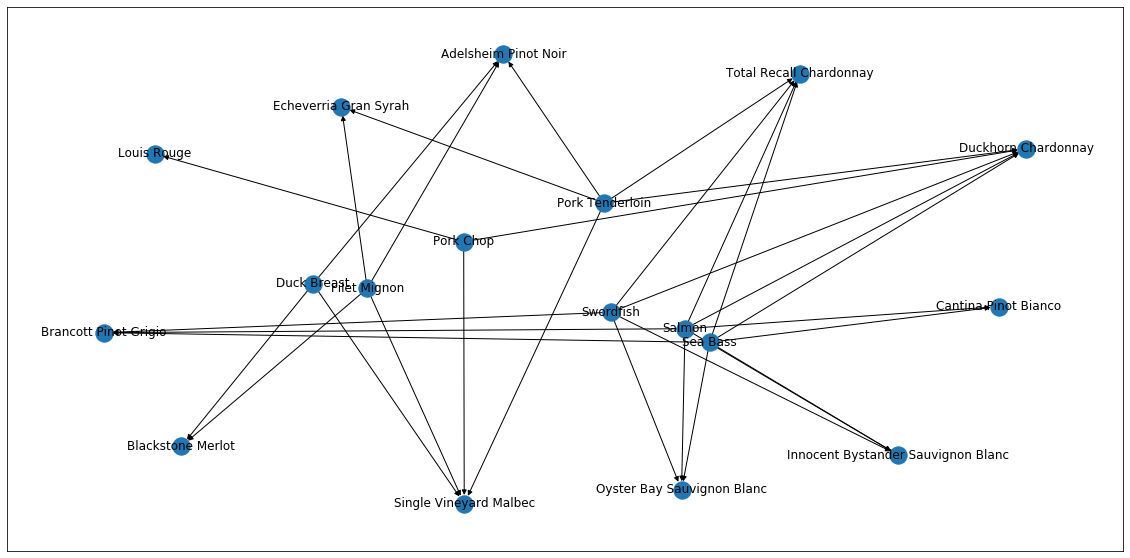

In [304]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G)